In [4]:
import pandas as pd
import numpy as np

In [5]:
cd C:\Users\lenovo\Downloads

C:\Users\lenovo\Downloads


In [6]:
df = pd.read_csv('dataset_ML.csv')

# 1Q) Explain any three new evaluation metrics (other than discussed in class) with proper explanation and analysis.

# F0.5-Measure

The F0.5-measure is an example of the Fbeta-measure with a beta value of 0.5.

It has the effect of raising the importance of precision and lowering the importance of recall.

If maximizing precision minimizes false positives, and maximizing recall minimizes false negatives, then the F0.5-measure puts more attention on minimizing false positives than minimizing false negatives.

The F0.5-Measure is calculated as follows:

    F0.5-Measure = ((1 + 0.5^2) * Precision * Recall) / (0.5^2 * Precision + Recall)
    F0.5-Measure = (1.25 * Precision * Recall) / (0.25 * Precision + Recall)
Consider the case where we have 50 percent precision and perfect recall. We can manually calculate the F0.5-measure for this case as follows:

    F0.5-Measure = (1.25 * Precision * Recall) / (0.25 * Precision + Recall)
    F0.5-Measure = (1.25 * 0.5 * 1.0) / (0.25 * 0.5 + 1.0)
    F0.5-Measure = 0.625 / 1.125
    F0.5-Measure = 0.555
    
We would expect that a beta value of 0.5 would result in a lower score for this scenario given that precision has a poor score and the recall is excellent.

This is exactly what we see, where an F0.5-measure of 0.555 is achieved for the same scenario where an F1-score was calculated as 0.667. Precision played more of a role in the calculation.

# F2-Mesure

The F2-measure is an example of the Fbeta-measure with a beta value of 2.0.

It has the effect of lowering the importance of precision and increase the importance of recall.

If maximizing precision minimizes false positives, and maximizing recall minimizes false negatives, then the F2-measure puts more attention on minimizing false negatives than minimizing false positives.

The F2-measure is calculated as follows:

    F2-Measure = ((1 + 2^2) * Precision * Recall) / (2^2 * Precision + Recall)
    F2-Measure = (5 * Precision * Recall) / (4 * Precision + Recall)
    
Consider the case where we have 50 percent precision and perfect recall.

We can manually calculate the F2-measure for this case as follows:

    F2-Measure = (5 * Precision * Recall) / (4 * Precision + Recall)
    F2-Measure = (5 * 0.5 * 1.0) / (4 * 0.5 + 1.0)
    F2-Measure = 2.5 / 3.0
    F2-Measure = 0.833
    
We would expect that a beta value of 2.0 would result in a higher score for this scenario given that recall has a perfect score, which will be promoted over that of the poor performance of precision.

This is exactly what we see where an F2-measure of 0.833 is achieved for the same scenario where an F1-score was calculated as 0.667. Recall played more of a role in the calculation.

# Cohen's kappa 

The Kappa Coefficient is generated from a statistical test to evaluate the accuracy of a classification. Kappa essentially evaluate how well the classification performed as compared to just randomly assigning values, i.e. did the classification do better than random. The Kappa Coefficient can range from -1 t0 1. A value of 0 indicated that the classification is no better than a random classification. A negative number indicates the classification is significantly worse than random. A value close to 1 indicates that the classification is significantly better than random.

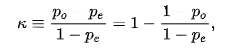

where po is the relative observed agreement among raters, and pe is the hypothetical probability of chance agreement, using the observed data to calculate the probabilities of each observer randomly seeing each category.

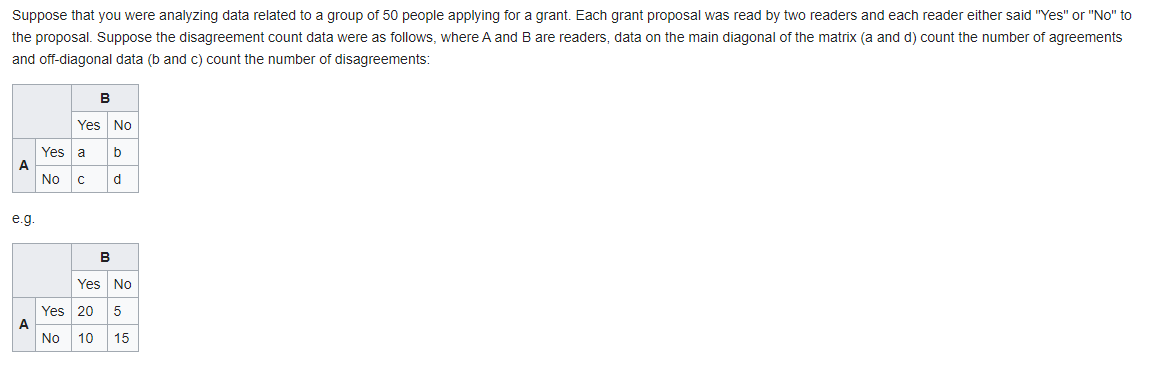

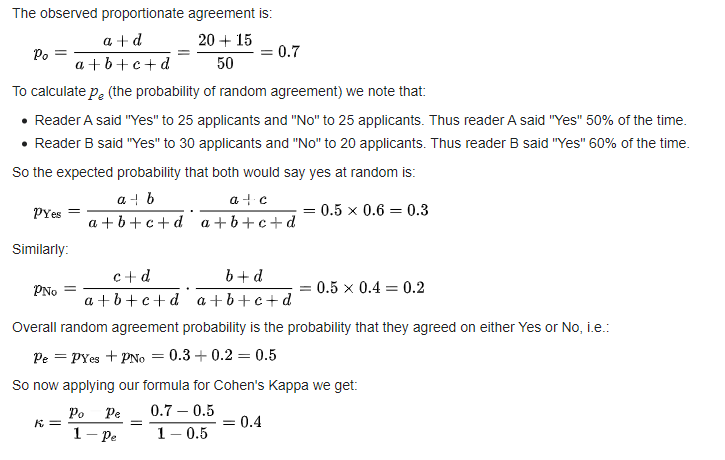

# 2Q) Calculate overall accuracy and class-wise accuracy.

In [7]:
def overall_accuracy(x,y):
    if x == y:
        return 1
    else:
        return 0

In [8]:
df['accuracy'] = df.apply(lambda x: overall_accuracy(x['Predicted Class'],x['Actual Class']), axis=1)

In [9]:
overall_accuracy = df[df['accuracy']==1].shape[0]/df.shape[0]

In [10]:
overall_accuracy*100

75.625

In [11]:
accuracy_class = dict()
classes = [0,1,2,3]
for i in classes:
    one_class = df[df['Actual Class']==i]
    accuracy_class[i] = one_class[one_class['accuracy']==1].shape[0]/one_class.shape[0]
    print('class '+str(i), 100*(one_class[one_class['accuracy']==1].shape[0]/one_class.shape[0]))

class 0 67.3469387755102
class 1 88.88888888888889
class 2 72.5
class 3 77.14285714285715


# Calculate confusion metrics.

In [12]:
confusion_mtx = pd.crosstab(df['Predicted Class'].values,df['Actual Class'].values)

In [13]:
confusion_mtx

col_0,0,1,2,3
row_0,,,,
0,33,1,3,2
1,8,32,2,3
2,4,3,29,3
3,4,0,6,27


# Calculate precision and recall for all classes and report macro average and weighted average values.

In [14]:
def precision(TP,FP):
    return  (TP)/(TP+FP)

def recall(TP,FN):
    return (TP)/(TP+FN)

In [15]:
df.drop('accuracy',axis=1,inplace=True)

In [16]:
precision_class = dict()
for i in classes:
    row = confusion_mtx[confusion_mtx.index==i].values.tolist()[0]
    TP = row[i]
    row.remove(TP)
    FP = sum(row)
    precision_class[i] = precision(TP,FP)
    print('class'+str(i)+' precision',precision(TP,FP)*100)

class0 precision 84.61538461538461
class1 precision 71.11111111111111
class2 precision 74.35897435897436
class3 precision 72.97297297297297


In [17]:
recall_class = dict()
for i in classes:
    col = confusion_mtx[i].values.tolist()
    TP = col[i]
    col.remove(TP)
    FN = sum(col)
    recall_class[i] = recall(TP,FN)
    print('class'+str(i)+' recall',recall(TP,FN)*100)

class0 recall 67.3469387755102
class1 recall 88.88888888888889
class2 recall 72.5
class3 recall 77.14285714285715


In [18]:
Macro_precision = (precision_class[0]+precision_class[1]+precision_class[2]+precision_class[3])/4
Macro_recall = (recall_class[0]+recall_class[1]+recall_class[2]+recall_class[3])/4
print('Macro Precision', Macro_precision*100)
print('Macro recall', Macro_recall*100)

Macro Precision 75.76461076461077
Macro recall 76.46967120181407


In [19]:
weighted_recall = ((recall_class[0]*df[df['Actual Class']==0].shape[0])+(recall_class[1]*df[df['Actual Class']==1].shape[0])+(recall_class[2]*df[df['Actual Class']==2].shape[0])+(recall_class[3]*df[df['Actual Class']==3].shape[0]))/(df[df['Actual Class']==0].shape[0]+df[df['Actual Class']==1].shape[0]+df[df['Actual Class']==2].shape[0]+df[df['Actual Class']==3].shape[0])
weighted_precision = ((precision_class[0]*df[df['Actual Class']==0].shape[0])+(precision_class[1]*df[df['Actual Class']==1].shape[0])+(precision_class[2]*df[df['Actual Class']==2].shape[0])+(precision_class[3]*df[df['Actual Class']==3].shape[0]))/(df[df['Actual Class']==0].shape[0]+df[df['Actual Class']==1].shape[0]+df[df['Actual Class']==2].shape[0]+df[df['Actual Class']==3].shape[0])

In [20]:
print('weighted_recall', weighted_recall*100)
print('weighted_precision', weighted_precision*100)

weighted_recall 75.625
weighted_precision 76.46604296604296


# calculate F1 score for all classes.

In [21]:
def f1_score(precision,recall):
    return 2*((precision*recall)/(precision+recall))

In [22]:
f1_class = dict()
for i in classes:
    f1_class[i] = f1_score(precision_class[i],recall_class[i])
    print('class'+str(i)+' f1score', f1_score(precision_class[i],recall_class[i])*100)

class0 f1score 75.0
class1 f1score 79.01234567901234
class2 f1score 73.41772151898734
class3 f1score 75.0


In [24]:
Macro_f1_score = (f1_class[0]+f1_class[1]+f1_class[2]+f1_class[3])/4
print('Macro f1score', Macro_f1_score*100)
weighted_f1 = ((f1_class[0]*df[df['Actual Class']==0].shape[0])+(f1_class[1]*df[df['Actual Class']==1].shape[0])+(f1_class[2]*df[df['Actual Class']==2].shape[0])+(f1_class[3]*df[df['Actual Class']==3].shape[0]))/(df[df['Actual Class']==0].shape[0]+df[df['Actual Class']==1].shape[0]+df[df['Actual Class']==2].shape[0]+df[df['Actual Class']==3].shape[0])
print('weighted_f1', weighted_f1*100)

Macro f1score 75.60751679949992
weighted_f1 75.5072081575246


# Report Type-1 and Type-II error for given data.

In [25]:
def fpr(FP,TN):
    return (FP)/(FP+TN)

def fnr(FN,TP):
    return (FN)/(FN+TP)

In [26]:
confusion_mtx

col_0,0,1,2,3
row_0,,,,
0,33,1,3,2
1,8,32,2,3
2,4,3,29,3
3,4,0,6,27


In [27]:
fpr_class = dict()
for i in classes:
    dummy = (confusion_mtx[confusion_mtx.index!=i])
    dummy = dummy.drop(i,axis=1)
    TN = np.sum(dummy.values)
    row = confusion_mtx[confusion_mtx.index==i].values.tolist()[0]
    TP = row[i]
    row.remove(TP)
    FP = sum(row)
    fpr_class[i] = fpr(FP,TN)
    print('class'+str(i)+' false positive rate',fpr(FP,TN)*100)

class0 false positive rate 5.405405405405405
class1 false positive rate 10.483870967741936
class2 false positive rate 8.333333333333332
class3 false positive rate 8.0


In [28]:
fnr_class = dict()
for i in classes:
    col = confusion_mtx[i].values.tolist()
    TP = col[i]
    col.remove(TP)
    FN = sum(col)
    fnr_class[i] = fnr(FN,TP)
    print('class'+str(i)+' False negative rate',fnr(FN,TP)*100)

class0 False negative rate 32.6530612244898
class1 False negative rate 11.11111111111111
class2 False negative rate 27.500000000000004
class3 False negative rate 22.857142857142858


# Draw a comparison table between above determined values and values observed from sklearn library (predefined library for performance evaluation).

In [29]:
report = pd.DataFrame()
report['class'] = ['class0','class1','class2','class3','macro avg','weighted avg']
report['precision'] = [precision_class[0],precision_class[1],precision_class[2],precision_class[3],Macro_precision,weighted_precision]
report['recall'] = [recall_class[0],recall_class[1],recall_class[2],recall_class[3],Macro_recall,weighted_recall]
report['f1-score'] = [f1_class[0],f1_class[1],f1_class[2],f1_class[3],Macro_f1_score,weighted_f1]

In [30]:
from sklearn.metrics import classification_report
class_names = ["class 0","class 1","class 2","class 3"]

print(classification_report(df['Actual Class'].values, df['Predicted Class'].values, target_names=class_names))

              precision    recall  f1-score   support

     class 0       0.85      0.67      0.75        49
     class 1       0.71      0.89      0.79        36
     class 2       0.74      0.72      0.73        40
     class 3       0.73      0.77      0.75        35

    accuracy                           0.76       160
   macro avg       0.76      0.76      0.76       160
weighted avg       0.76      0.76      0.76       160



In [31]:
report.index = report['class']

In [32]:
report.drop('class',axis=1)

,precision,recall,f1-score
class,,,
class0,0.846154,0.673469,0.750000
class1,0.711111,0.888889,0.790123
class2,0.743590,0.725000,0.734177
class3,0.729730,0.771429,0.750000
macro avg,0.757646,0.764697,0.756075
weighted avg,0.764660,0.756250,0.755072


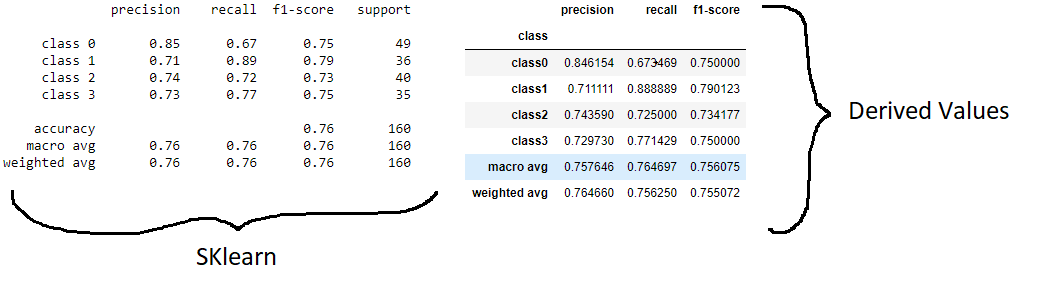

# Use any 2 metrics from Question 1 for implementation and report your results for this dataset.

In [33]:
def f2_score(precision,recall):
    return 5*(precision*recall)/((4*precision)+recall)
    
f2_class = dict()
for i in classes:
    f2_class[i] = f2_score(precision_class[i],recall_class[i])
    print('class'+str(i)+' f2score', f2_score(precision_class[i],recall_class[i])*100)

class0 f2score 70.2127659574468
class1 f2score 84.65608465608466
class2 f2score 72.8643216080402
class3 f2score 76.27118644067797


In [34]:
def f_0_5_score(precision,recall):
    return 2*(precision*recall)/(precision+recall)
    
f_0_5_class = dict()
for i in classes:
    f_0_5_class[i] = f_0_5_score(precision_class[i],recall_class[i])
    print('class'+str(i)+' f0.5score', f_0_5_score(precision_class[i],recall_class[i])*100)

class0 f0.5score 75.0
class1 f0.5score 79.01234567901234
class2 f0.5score 73.41772151898734
class3 f0.5score 75.0


In [35]:
def p_O(mtx):
    return (sum([mtx[i][i] for i in range(mtx.shape[0])]))/np.sum(mtx.values)

def p_L(mtx):
    rand = []
    for i in range(mtx.shape[0]):
        rand.append((np.sum(mtx.values[:,[i]])/np.sum(mtx.values))*(np.sum(mtx.values[i])/np.sum(mtx.values)))
    return sum(rand)

def kappa_form(p1,p2):
    return (p1-p2)/(1-p2)

def coeff_kappa(mtx):
    po = p_O(mtx)
    pl = p_L(mtx)
    return kappa_form(po,pl)

In [38]:
print('kappa score', coeff_kappa(confusion_mtx)*100)

kappa score 67.52368064952638


https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

http://gis.humboldt.edu/OLM/Courses/GSP_216_Online/lesson6-2/metrics.html#:~:text=To%20calculate%20the%20overall%20accuracy,total%20number%20of%20reference%20site.&text=We%20could%20also%20express%20this,error%20%2B%20accuracy%20%3D%20100%25.